## The goal of this study is 
### 1)	Identify and visualize the factors that lead customers to terminate their credit cards.
### 2)	Build predictions model that used for classifying if a customer is going to churn or not.
### 3)	Do Model Evaluation to choose the best model.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Data Extraction

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

# Exploratory Data Analysis (EDA)

## Checking Missing Value and Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.groupby('Exited').agg({'CustomerId':'count'})

,CustomerId
Exited,
0,7963
1,2037


#### 1) There is no missing value.
#### 2) Continuous Data: Age, Estimated Salary, Balance, CreditScore
#### 3a) Categorical Data: Gender, Geography,Tenure
#### 3b) HasCrCard, IsActiveMember and NumofProducts should be Categorical/ Binary Data rather than int64
#### 4a) Label: Exited should be Categorical data
#### 4b) Label: Exited is imbalance, the proportion of Exit:Not Exit around 20%:80%

## Prepare Dataset for EDA

In [5]:
EDA_Data=df.copy()
EDA_Data['Exited']=EDA_Data['Exited'].apply(lambda x: 'Exit' if x==1 else 'Not Exit')
EDA_Data['HasCrCard']=EDA_Data['HasCrCard'].apply(lambda x: 'Has Credit Card' if x==1 else 'Do not have Credit Card')
EDA_Data['IsActiveMember']=EDA_Data['IsActiveMember'].apply(lambda x: 'Active Member' if x==1 else 'Inactive Member')
EDA_Data['NumOfProducts']=EDA_Data['NumOfProducts'].astype('str')

In [6]:
EDA_Data.drop(['RowNumber','CustomerId'],axis=1).describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


## Part 1: Full Picture Overview

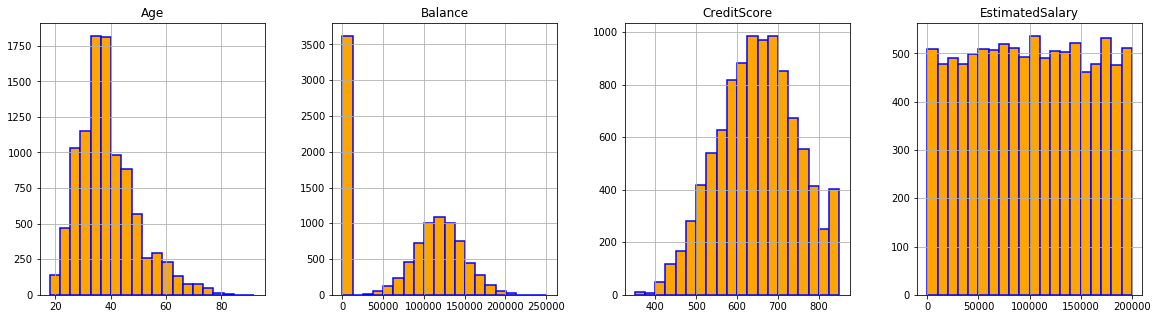

In [7]:
ContData = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
EDA_Data[ContData].hist(figsize = (25, 5), bins = 20, layout = (1, 5),  linewidth = 1.5,color='orange', edgecolor='b');

#### We can see that:
#### 1) Our customers with age between 18-92, tend to be right than left.
#### 2) Apart from customers without balance, customers with balance is normal distributed.
#### 3) Our customers with CreditScore between 350-850, most of them with CreditScore higher than 600.
#### 4) EstimatedSalary is evenly distributed, which can be ignored in model training.

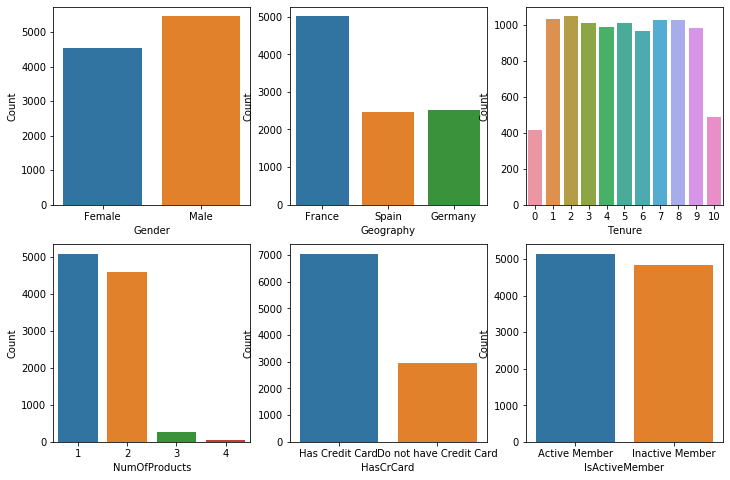

In [8]:
CatData = ['Gender','Geography','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
CatData1 = EDA_Data[CatData]
fig, ax = plt.subplots(2, 3, figsize = (12, 8))
for index, column in enumerate(CatData1.columns):
    plt.subplot(2, 3, index + 1)
    sns.countplot(x = column, data = CatData1)
    plt.ylabel('Count')

#### We can see that:
#### 1) Male customer is more than Female customer.
#### 2) Customer in France is 50% more than Spain and Germany respectively.
#### 3) Tenure is evenly distributed for those 1-9 years, only a few customer leaves less than 1 year.
#### 4) Most of our customer has 1 to 2 numbers of products.
#### 5) More than 2/3 customers have Credit Card.
#### 6) More than half customers are active.

## Part 2: Comparision between Exited and Not Exited Customer

In [9]:
## Prepare 2 datasets: Exit and Not Exit
TE=EDA_Data[EDA_Data['Exited']=='Exit']
FE=EDA_Data[EDA_Data['Exited']=='Not Exit']

### 1) Relationship between Age and Exited

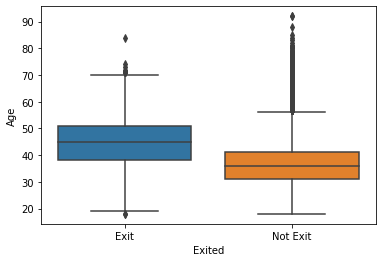

In [10]:
sns.boxplot(x='Exited',y='Age',data=EDA_Data)

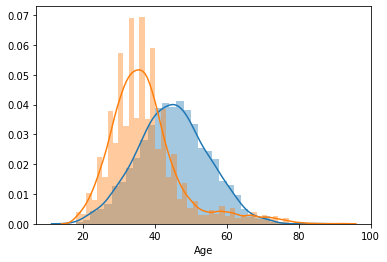

In [11]:
sns.distplot(a=TE['Age'],label='Exited',kde=True)
sns.distplot(a=FE['Age'],label='Not Exited',kde=True)

#### Overall, customer who exited is older than those not exit. 
#### The median of exited customer is around 45 years old.
#### The median of exited customer is already older than 75% not exit customer.

### 2) Relationship between Balance and Exited

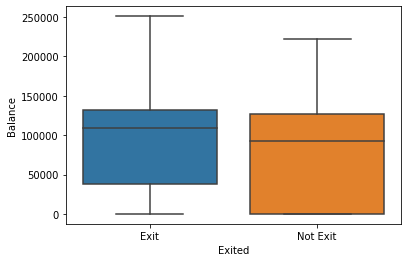

In [267]:
sns.boxplot(x='Exited',y='Balance',data=EDA_Data)

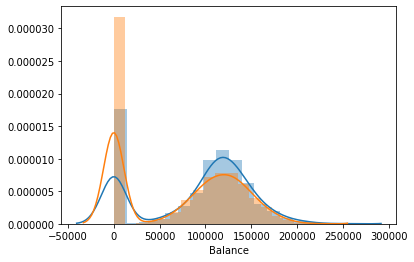

In [268]:
sns.distplot(a=TE['Balance'],label='Exited',kde=True)
sns.distplot(a=FE['Balance'],label='Not Exited',kde=True)

#### Customer whose balance less than $40000 are more likely not exit
#### The distribution of Exit and Not Exit customer are so similar

### 3) Relationship between Credit Score and Exited

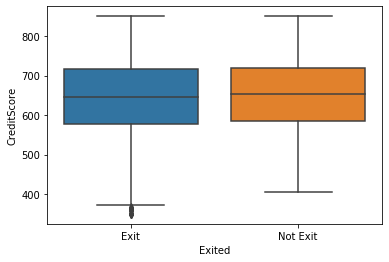

In [269]:
sns.boxplot(x='Exited',y='CreditScore',data=EDA_Data)

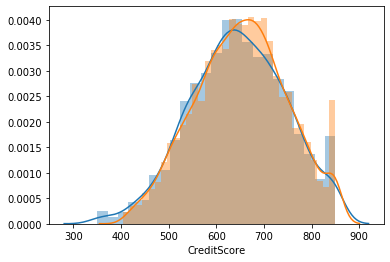

In [278]:
sns.distplot(a=TE['CreditScore'],label='Exited',kde=True)
sns.distplot(a=FE['CreditScore'],label='Not Exited',kde=True)

#### There is no significant differnet between Exited and Not Exited Customer in term of Credit Score
#### There are some outliers whose score fall around 350. 

### 4) Relationship between EstimatedSalary and Exited

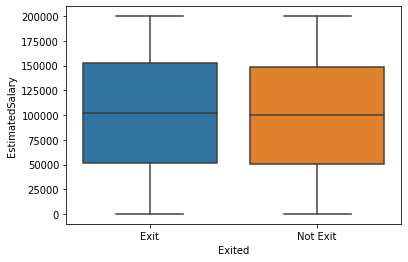

In [12]:
sns.boxplot(x='Exited',y='EstimatedSalary',data=EDA_Data)

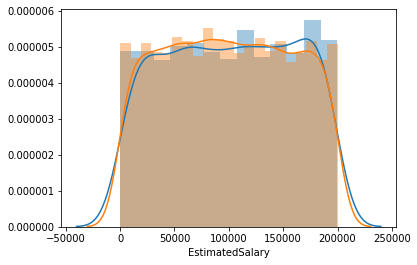

In [279]:
sns.distplot(a=TE['EstimatedSalary'],label='Exited',kde=True)
sns.distplot(a=FE['EstimatedSalary'],label='Not Exited',kde=True)

#### There is no significant differnet between Exited and Not Exited Customer in term of Estimated Salary

### Correlation between continuous features

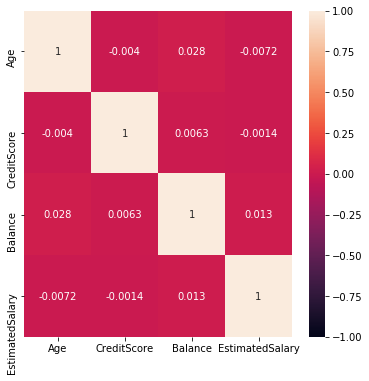

In [21]:
plt.figure(figsize=(6,6))
EDA2=EDA_Data.loc[:,['Exited','Age', 'CreditScore', 'Balance', 'EstimatedSalary']]
sns.heatmap(EDA2.corr(),vmin=-1,vmax=1,annot=True)

#### Features with color close to 0 means no correlation, 
#### Features with color close to -1 or 1 means having strong negative or postive relationship to each other respectively. 
#### From the above heat map, we can see that all continuous features only have weak relationship to each other.
#### Therefore, the data does not have multicollinearity.

### Relationship between Categorical Features and Exited

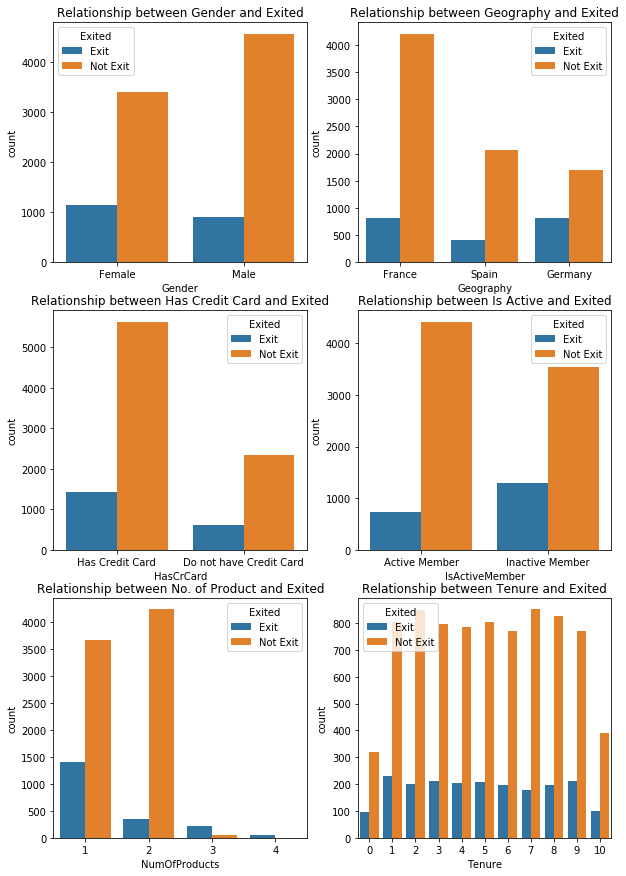

In [283]:
fig, axis = plt.subplots(3, 2, figsize=(10,15),)
axis[0,0].set_title("Relationship between Gender and Exited")
axis[0,1].set_title("Relationship between Geography and Exited")
axis[1,0].set_title("Relationship between Has Credit Card and Exited")
axis[1,1].set_title("Relationship between Is Active and Exited")
axis[2,0].set_title("Relationship between No. of Product and Exited")
axis[2,1].set_title("Relationship between Tenure and Exited")

sns.countplot(x='Gender',hue='Exited',data=EDA_Data,ax=axis[0,0])
sns.countplot(x='Geography',hue='Exited',data=EDA_Data,ax=axis[0,1])
sns.countplot(x='HasCrCard',hue='Exited',data=EDA_Data,ax=axis[1,0])
sns.countplot(x='IsActiveMember',hue='Exited',data=EDA_Data,ax=axis[1,1])
sns.countplot(x='NumOfProducts',hue='Exited',data=EDA_Data,ax=axis[2,0])
sns.countplot(x='Tenure',hue='Exited',data=EDA_Data,ax=axis[2,1])

#axis[2,1].remove()

#### From the above diagram, we can see that:
#### 1) More Female exit than Male
#### 2) Customer in Germany more likely to exit
#### 3) Inactive Member has higher proportion to exit than Active Member
#### 4) Credit Card does not affect the churn rate
#### 5) Customer with 2 products have higher proportion not exit; customer has more than or equal to 3 products are more likely to leave.
#### 6) Tenure does not affect the churn rate

#### To sum up, Age, Gender, NumOfProduct, Geography, IsActiveMember and Balance are features that affect churn rate.

## Part 3: Train Data without Feature Selected - Set 1

In [25]:
X0=df.iloc[:,3:-1]
X0_c=X0.loc[:,['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']]

#### Apply OneHotEncoding to Categorical Data: (Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember)

In [26]:
X0_c=pd.get_dummies(X0_c)

In [27]:
from sklearn.preprocessing import StandardScaler
X0_n=X0.loc[:,['CreditScore','Age','Balance','Tenure','EstimatedSalary']]
scaler = StandardScaler()
X0_n1=scaler.fit_transform(X0_n)

In [28]:
X0_n1=pd.DataFrame(X0_n1,columns=['CreditScore','Age','Balance','Tenure','EstimatedSalary'])

In [29]:
X=pd.concat([X0_c,X0_n1],axis=1)
y=EDA_Data['Exited'].apply(lambda x: 1 if x=='Exit' else 0)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Generating new data by oversampling
#### As mentioned before, the data is imbalance, so, we increase the number of samples by SMOTE technique

In [31]:
#conda install -c conda-forge imbalanced-learn

In [32]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [33]:
print(y_train.value_counts(),'\n',y_test.value_counts())

1    6356
0    6356
Name: Exited, dtype: int64 
 1    1607
0    1607
Name: Exited, dtype: int64


#### Start to Train Model

In [34]:
Accuracy_Score=[]
Recall_Score=[]
Precision_Score=[]
F1_Score=[]

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred=clf.predict(X_test)
s1_1_y_pred=y_pred
clf.score(X_test, y_test)

0.7800248911014313

In [36]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.780 
 Recall Score: 0.803 
 Precision Score: 0.768 
 F1 Score Score: 0.785


### SVC (Support Vector Classifier)

In [37]:
from sklearn.svm import SVC
clf = SVC(random_state=42)
svc=clf.fit(X_train, y_train)
y_pred=svc.predict(X_test)
s1_2_y_pred=y_pred
svc.score(X_test, y_test)

0.8217174859987555

In [38]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.822 
 Recall Score: 0.830 
 Precision Score: 0.816 
 F1 Score Score: 0.823


### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
s1_3_y_pred=y_pred
clf.score(X_test, y_test)

0.8217174859987555

In [40]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.822 
 Recall Score: 0.752 
 Precision Score: 0.874 
 F1 Score Score: 0.808


### XGBoost

In [41]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
param = {'max_depth':6, 'eta':0.3, 'objective':'binary:hinge' } #Use default value in the first time
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = bst.predict(dtest)
s1_4_y_pred=y_pred
accuracy_score(y_test,y_pred)

0.6235220908525202

In [42]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.624 
 Recall Score: 0.986 
 Precision Score: 0.572 
 F1 Score Score: 0.724


In [43]:
# Set 1 Score:
ind_name=['Accuracy_Score','Recall_Score','Precision_Score','F1_Score']
summary1=pd.DataFrame(np.vstack((Accuracy_Score,Recall_Score,Precision_Score,F1_Score)),columns=['Logistic Reg.','SVC','Random Forest','XGB'],index=ind_name)
summary1

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.780025,0.821717,0.821717,0.623522
Recall_Score,0.802738,0.830118,0.752334,0.985688
Precision_Score,0.767857,0.816401,0.873555,0.571635
F1_Score,0.784910,0.823203,0.808425,0.723618


## Train Data with Feature Selected (Based on EDA) - Set 2 
### [Keep all hyperparameter same as Set 1]

### Remove Estimated Salary, Has Credit Card, Credit Score and Tenure refer to EDA
### Perform Data Engineering

In [133]:
X1=df.iloc[:,3:-1]
X1_c=X1.loc[:,['Geography','Gender','NumOfProducts','IsActiveMember']]
X1_n=X1.loc[:,['Age','Balance']]

In [136]:
def age_gp(a):
    if a>=18 and a<30:
        return 'Gp1'
    elif a>=30 and a<40:
        return 'Gp2'
    elif a>=40 and a<50:
        return 'Gp3'
    elif a>=50 and a<60:
        return 'Gp4'
    elif a>=60 and a<70:
        return 'Gp5'
    elif a>=70:
        return 'Gp6'

In [137]:
X1_c['Age_group']=X1_n['Age'].apply(age_gp)

In [138]:
X1_c.head(3)

,Geography,Gender,NumOfProducts,IsActiveMember,Age_group
0,France,Female,1,1,Gp3
1,Spain,Female,1,1,Gp3
2,France,Female,3,0,Gp3


In [139]:
def balance_gp(a):
    if a<=50000:
        return 'Gp1'
    elif a<=100000:
        return 'Gp2'
    elif a<=150000:
        return 'Gp3'
    elif a>150000:
        return 'Gp4'

In [140]:
X1_c['Balance_Group']=X1_n['Balance'].apply(balance_gp)

In [143]:
def NumOfProduct_gp(a):
    if a==1:
        return 'Gp1'
    elif a==2:
        return 'Gp2'
    elif a>=3:
        return 'Gp3'

In [147]:
X1_c['NumOfProducts']=X1_c['NumOfProducts'].apply(NumOfProduct_gp)

In [149]:
X1_c['IsActiveMember']=X1_c['IsActiveMember'].astype('str')
X1_c2=pd.get_dummies(X1_c.iloc[:,0:4])
y=EDA_Data['Exited'].apply(lambda x: 1 if x=='Exit' else 0)

In [150]:
X1_c2.head(5)

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_Gp1,NumOfProducts_Gp2,NumOfProducts_Gp3,IsActiveMember_0,IsActiveMember_1
0,1,0,0,1,0,1,0,0,0,1
1,0,0,1,1,0,1,0,0,0,1
2,1,0,0,1,0,0,0,1,1,0
3,1,0,0,1,0,0,1,0,1,0
4,0,0,1,1,0,1,0,0,0,1


In [151]:
X1_n.head(5)

,Age,Balance
0,42,0.00
1,41,83807.86
2,42,159660.80
3,39,0.00
4,43,125510.82


In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1_n=scaler.fit_transform(X1_n)

In [153]:
X1_n=pd.DataFrame(X1_n)
X1_c2=pd.concat((X1_n,X1_c2),axis=1)

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1_c2, y, test_size=0.2, random_state=42)

#### Generating new data by oversampling
#### Same as before, as the data is imbalance, so, we increase the number of samples by SMOTE technique

In [156]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [157]:
print(y_train.value_counts(),'\n',y_test.value_counts())

1    6356
0    6356
Name: Exited, dtype: int64 
 1    1607
0    1607
Name: Exited, dtype: int64


#### Start to Train Model

In [158]:
Accuracy_Score=[]
Recall_Score=[]
Precision_Score=[]
F1_Score=[]

### Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred=clf.predict(X_test)
s2_1_y_pred=y_pred
clf.score(X_test, y_test)


0.7722464219041693

In [160]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.772 
 Recall Score: 0.783 
 Precision Score: 0.766 
 F1 Score Score: 0.775


### SVC (Support Vector Classifier)

In [161]:
from sklearn.svm import SVC
clf = SVC(random_state=42)
svc=clf.fit(X_train, y_train)
y_pred=svc.predict(X_test)
s2_2_y_pred=y_pred
svc.score(X_test, y_test)

0.7576228998133168

In [162]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.758 
 Recall Score: 0.765 
 Precision Score: 0.754 
 F1 Score Score: 0.759


### Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
s2_3_y_pred=y_pred
clf.score(X_test, y_test)

0.7890479153702551

In [164]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.789 
 Recall Score: 0.719 
 Precision Score: 0.836 
 F1 Score Score: 0.773


### XGBoosting

In [165]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
param = {'max_depth':6, 'eta':0.3, 'objective':'binary:hinge' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = bst.predict(dtest)
s2_4_y_pred=y_pred
accuracy_score(y_test,y_pred)

0.5899191039203485

In [166]:
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.590 
 Recall Score: 0.993 
 Precision Score: 0.550 
 F1 Score Score: 0.708


In [167]:
# Set 2 Score:
ind_name=['Accuracy_Score','Recall_Score','Precision_Score','F1_Score']
summary2=pd.DataFrame(np.vstack((Accuracy_Score,Recall_Score,Precision_Score,F1_Score)),columns=['Logistic Reg.','SVC','Random Forest','XGB'],index=ind_name)
summary2

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.772246,0.757623,0.789048,0.589919
Recall_Score,0.783447,0.765401,0.719353,0.993155
Precision_Score,0.766281,0.753676,0.835864,0.549776
F1_Score,0.774769,0.759494,0.773244,0.707761


In [168]:
summary1

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.780025,0.821717,0.821717,0.623522
Recall_Score,0.802738,0.830118,0.752334,0.985688
Precision_Score,0.767857,0.816401,0.873555,0.571635
F1_Score,0.784910,0.823203,0.808425,0.723618


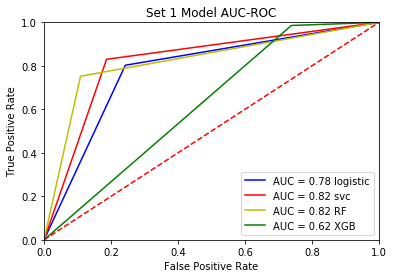

In [169]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]


fpr11, tpr11, threshold = metrics.roc_curve(y_test, s1_1_y_pred)
roc_auc11 = metrics.auc(fpr11, tpr11)
fpr12, tpr12, threshold = metrics.roc_curve(y_test, s1_2_y_pred)
roc_auc12 = metrics.auc(fpr12, tpr12)
fpr13, tpr13, threshold = metrics.roc_curve(y_test, s1_3_y_pred)
roc_auc13 = metrics.auc(fpr13, tpr13)
fpr14, tpr14, threshold = metrics.roc_curve(y_test, s1_4_y_pred)
roc_auc14 = metrics.auc(fpr14, tpr14)


# method I: plt
import matplotlib.pyplot as plt
plt.title('Set 1 Model AUC-ROC')
plt.plot(fpr11, tpr11, 'b', label = 'AUC = %0.2f logistic' % roc_auc11)
plt.plot(fpr12, tpr12, 'r', label = 'AUC = %0.2f svc' % roc_auc12)
plt.plot(fpr13, tpr13, 'y', label = 'AUC = %0.2f RF' % roc_auc13)
plt.plot(fpr14, tpr14, 'g', label = 'AUC = %0.2f XGB' % roc_auc14)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

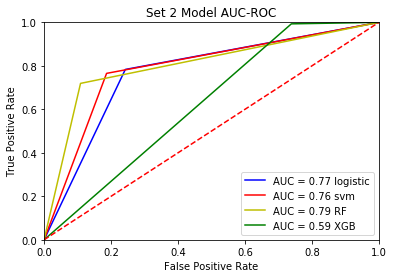

In [170]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]


fpr21, tpr21, threshold = metrics.roc_curve(y_test, s2_1_y_pred)
roc_auc21 = metrics.auc(fpr21, tpr21)
fpr22, tpr22, threshold = metrics.roc_curve(y_test, s2_2_y_pred)
roc_auc22 = metrics.auc(fpr22, tpr22)
fpr23, tpr23, threshold = metrics.roc_curve(y_test, s2_3_y_pred)
roc_auc23 = metrics.auc(fpr23, tpr23)
fpr24, tpr24, threshold = metrics.roc_curve(y_test, s2_4_y_pred)
roc_auc24 = metrics.auc(fpr24, tpr24)


# method I: plt
import matplotlib.pyplot as plt
plt.title('Set 2 Model AUC-ROC')
plt.plot(fpr11, tpr21, 'b', label = 'AUC = %0.2f logistic' % roc_auc21)
plt.plot(fpr12, tpr22, 'r', label = 'AUC = %0.2f svm' % roc_auc22)
plt.plot(fpr13, tpr23, 'y', label = 'AUC = %0.2f RF' % roc_auc23)
plt.plot(fpr14, tpr24, 'g', label = 'AUC = %0.2f XGB' % roc_auc24)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [171]:
summary1

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.780025,0.821717,0.821717,0.623522
Recall_Score,0.802738,0.830118,0.752334,0.985688
Precision_Score,0.767857,0.816401,0.873555,0.571635
F1_Score,0.784910,0.823203,0.808425,0.723618


In [172]:
summary2

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.772246,0.757623,0.789048,0.589919
Recall_Score,0.783447,0.765401,0.719353,0.993155
Precision_Score,0.766281,0.753676,0.835864,0.549776
F1_Score,0.774769,0.759494,0.773244,0.707761


#### We can see that the best model among Set 1 and Set 2 is 'Random Forest in Set 1'
#### All Models have higher score in Set 1 than Set 2
#### However, for building a Churn Model, it is more important to predict customer who will leave correctly rather than the overall accuracy of the model.
#### Let's think carefully: 
#### For Type I error, which is the error to predict the customer who exit, but actually he/she doesn't. 
#### For Type II error, which is the error to predict the customer who not exist, but actually he/she does.
#### Which error is more serious? It should be Type II error.
#### For Type I error case, if we predict wrongly, we may waste cost/resource to retain a customer who actually will stay.
#### For Type II error case, if we predict wrongly, we may take no action to the customer and the customer will therefore leave.
#### Therefore, Recall Score is much more important than Accuracy Score.
#### Before select which model to be used, let's fine tune our model!

## Hyperparameter Tuning - Set 1
I will try to fine tune the Hyperparameter and hope to obtain a better Accuracy and Recall Rate:

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
X=pd.concat([X0_c,X0_n1],axis=1)
y=EDA_Data['Exited'].apply(lambda x: 1 if x=='Exit' else 0)

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [194]:
pd.DataFrame(y_train).groupby('Exited').agg({'Exited':'count'})

,Exited
Exited,
0,6356
1,6356


In [195]:
Accuracy_Score=[]
Recall_Score=[]
Precision_Score=[]
F1_Score=[]

### Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression

clf =  LogisticRegression(random_state=42)
param_grid = [
    {'C':[0.01,0.1,1,10]}]
     #'max_iter':[100,150,200,1000]}]
    #{'solver': ['newton-cg','sag','lbfgs' ],'penalty':['l2']}] 
    #{'solver': ['liblinear','saga'],'penalty':['l1']}]
search = GridSearchCV(clf, param_grid,scoring='accuracy',cv=5)
lr=search.fit(X_train, y_train)

lr=clf.fit(X_train, y_train)
y_pred=lr.predict(X_test)
lr.score(X_test, y_test) 

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

#search.cv_results_


 Accuracy Score: 0.778 
 Recall Score: 0.805 
 Precision Score: 0.765 
 F1 Score Score: 0.784


In [197]:
from sklearn.linear_model import LogisticRegression

clf =  LogisticRegression(random_state=42)

param_grid = [
    {'C':[0.01,0.1,1,10]}]
  #{'solver': ['newton-cg','sag','lbfgs' ],'penalty':['l2']}]
  #{'solver': ['liblinear','saga'],'penalty':['l1']}]
search = GridSearchCV(clf, param_grid,scoring='recall', cv=5)
lr=search.fit(X_train, y_train)

#lr=clf.fit(X_train, y_train)
y_pred=lr.predict(X_test)
lr.score(X_test, y_test) 

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

#search.cv_results_

 Accuracy Score: 0.773 
 Recall Score: 0.800 
 Precision Score: 0.760 
 F1 Score Score: 0.779


### SVC (Support Vector Classifier)

In [198]:
from sklearn.svm import SVC
clf = SVC(random_state=42, kernel='rbf')

param_grid = [
  {'C': [0.01,0.1,1,10]}]

search = GridSearchCV(clf, param_grid,scoring='accuracy', cv=5)
svc=search.fit(X_train, y_train)
y_pred=svc.predict(X_test)
svc.score(X_test, y_test) 

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_

 Accuracy Score: 0.823 
 Recall Score: 0.818 
 Precision Score: 0.826 
 F1 Score Score: 0.822


In [199]:
from sklearn.svm import SVC
clf = SVC(random_state=42, kernel='rbf')

param_grid = [
  {'C': [0.01,0.1,1,10],
   'gamma':['scale', 'auto']}]

search = GridSearchCV(clf, param_grid,scoring='recall', cv=5)
svc=search.fit(X_train, y_train)
y_pred=svc.predict(X_test)
svc.score(X_test, y_test)

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_

 Accuracy Score: 0.823 
 Recall Score: 0.818 
 Precision Score: 0.826 
 F1 Score Score: 0.822


### Random Forest

In [200]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
param_grid = [
  {'n_estimators' : [140,150,160,170,180,190,200]}]

search = GridSearchCV(clf, param_grid,scoring='accuracy', cv=5)
clf=search.fit(X_train, y_train)
y_pred=clf.predict(X_test)

clf.score(X_test, y_test)
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_  

 Accuracy Score: 0.834 
 Recall Score: 0.777 
 Precision Score: 0.878 
 F1 Score Score: 0.824


In [201]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
param_grid = [
  {'n_estimators' : [140,150,160,170,180,190,200]}]

search = GridSearchCV(clf, param_grid, scoring='recall', cv=5)
clf=search.fit(X_train, y_train)
y_pred=clf.predict(X_test)

clf.score(X_test, y_test)
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_ 

 Accuracy Score: 0.834 
 Recall Score: 0.777 
 Precision Score: 0.878 
 F1 Score Score: 0.824


### XGBoost

In [202]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
param = {'max_depth':4, 'eta':0.6, 'objective':'binary:hinge'}
num_round = 20
bst = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = bst.predict(dtest)
accuracy_score(y_test,y_pred)

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.871 
 Recall Score: 0.871 
 Precision Score: 0.871 
 F1 Score Score: 0.871


In [203]:
# Set 3 Score:
ind_name=['Accuracy_Score','Recall_Score','Precision_Score','F1_Score']
summary3=pd.DataFrame(np.vstack((Accuracy_Score,Recall_Score,Precision_Score,F1_Score)),
                      columns=['Logistic Reg.(Accuracy)','Logistic Reg.(Recall)',
                               'SVC (Accuracy)','SVC (Recall)',
                               'Random Forest (Accuracy)','Random Forest (Recall)'
                               ,'XGB'],index=ind_name)
summary3

,Logistic Reg.(Accuracy),Logistic Reg.(Recall),SVC (Accuracy),SVC (Recall),Random Forest (Accuracy),Random Forest (Recall),XGB
Accuracy_Score,0.778469,0.773491,0.822651,0.822651,0.834474,0.834474,0.870566
Recall_Score,0.804605,0.800249,0.817673,0.817673,0.777225,0.777225,0.870566
Precision_Score,0.764636,0.759598,0.825896,0.825896,0.877723,0.877723,0.870566
F1_Score,0.784112,0.779394,0.821764,0.821764,0.824422,0.824422,0.870566


In [204]:
summary1

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.780025,0.821717,0.821717,0.623522
Recall_Score,0.802738,0.830118,0.752334,0.985688
Precision_Score,0.767857,0.816401,0.873555,0.571635
F1_Score,0.784910,0.823203,0.808425,0.723618


In [205]:
summary2

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.772246,0.757623,0.789048,0.589919
Recall_Score,0.783447,0.765401,0.719353,0.993155
Precision_Score,0.766281,0.753676,0.835864,0.549776
F1_Score,0.774769,0.759494,0.773244,0.707761


## Hyperparameter Tuning - Set 2
Also, I will try to fine tune the Hyperparameter and hope to obtain a better Accuracy and Recall Rate:

In [212]:
X1_c2.head(2)

,0,1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_Gp1,NumOfProducts_Gp2,NumOfProducts_Gp3,IsActiveMember_0,IsActiveMember_1
0,0.324324,0.000000,1,0,0,1,0,1,0,0,0,1
1,0.310811,0.334031,0,0,1,1,0,1,0,0,0,1


In [213]:
#X1_c2=pd.get_dummies(X1_c)
y=EDA_Data['Exited'].apply(lambda x: 1 if x=='Exit' else 0)

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1_c2, y, test_size=0.2, random_state=42)

In [215]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [216]:
pd.DataFrame(y_train).groupby('Exited').agg({'Exited':'count'})

,Exited
Exited,
0,6356
1,6356


In [264]:
Accuracy_Score=[]
Recall_Score=[]
Precision_Score=[]
F1_Score=[]

### Logistic Regression

In [265]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)


param_grid = [
    {'C':[5,10],'max_iter':[100,1000]}]
  #{'C':[0.1,1,10],'max_iter':[1000,10000]}]
  #{'solver': ['newton-cg','sag','lbfgs'],'C':[0.1,1,10],'max_iter':[1000,10000]}] 
  #{'solver': ['newton-cg','sag','lbfgs' ],'penalty':['l2'],'C':[0.1,1,10],'max_iter':[1000,10000]}] #1
  #{'solver': ['liblinear','saga'],'penalty':['l1'],'max_iter':[1000,10000]}]
search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)


lr=search.fit(X_train, y_train)
y_pred=lr.predict(X_test)
lr.score(X_test, y_test) 

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_  #(No much Change)

 Accuracy Score: 0.770 
 Recall Score: 0.776 
 Precision Score: 0.767 
 F1 Score Score: 0.771


In [266]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)

param_grid = [
    #{'C':[0.1,1,10],'max_iter':[1000,10000]}]
  #{'solver': ['newton-cg','sag','lbfgs' ],'C':[0.1,1,10],'max_iter':[1000,10000]}] 
  #{'solver': ['newton-cg','sag','lbfgs' ],'penalty':['l2'],'C':[0.1,1,10],'max_iter':[1000,10000]}]
  {'solver': ['liblinear','saga'],'penalty':['l1'],'C':[0.1,1,10],'max_iter':[1000,10000]}]
search = GridSearchCV(clf, param_grid, scoring='recall', cv=5)


lr=search.fit(X_train, y_train)
y_pred=lr.predict(X_test)
lr.score(X_test, y_test) 

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_  (No much Change)

 Accuracy Score: 0.769 
 Recall Score: 0.772 
 Precision Score: 0.767 
 F1 Score Score: 0.769


### SVC (Support Vector Classifier)

In [267]:
from sklearn.svm import SVC

clf = SVC(random_state=42)#,C=1,kernel='rbf',gamma='scale')


param_grid = [
    {'C': [0.01,0.1,1,10]}]    
   #{'C': [0.01,0.1,1,10], 'kernel': ['rbf'],'gamma':['scale','auto']}]

search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
svc=search.fit(X_train, y_train)
y_pred=svc.predict(X_test)


#svc=clf.fit(X_train, y_train)
#y_pred=svc.predict(X_test)
#s2_2_y_pred=y_pred

svc.score(X_test, y_test)
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_ 

 Accuracy Score: 0.780 
 Recall Score: 0.773 
 Precision Score: 0.785 
 F1 Score Score: 0.779


In [268]:
from sklearn.svm import SVC

clf = SVC(random_state=42)#,C=1,kernel='rbf',gamma='scale')


param_grid = [
  #{'C': [0.01,0.1,1,10]}]    
  {'C': [0.01,0.1,1,10], 'kernel': ['rbf'],'gamma':['scale','auto']}]

search = GridSearchCV(clf, param_grid, scoring='recall', cv=5)

svc=search.fit(X_train, y_train)
y_pred=svc.predict(X_test)


#svc=clf.fit(X_train, y_train)
#y_pred=svc.predict(X_test)
#s2_2_y_pred=y_pred

svc.score(X_test, y_test)
print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))
#search.cv_results_ 

 Accuracy Score: 0.674 
 Recall Score: 0.829 
 Precision Score: 0.632 
 F1 Score Score: 0.717


### Random Forest

In [269]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
param_grid = [
  #{'n_estimators' : [100,150,200],'max_depth':[5,10,15]}]
  {'n_estimators' : [100,110,120,130,140,150],'max_depth':[5,6,7,8,9,10]}]
  #{'n_estimators' : [100,110,120,130,140,150],'max_depth':[9,10]}]
  #{'n_estimators' : [110,111,112,113,114,115,116,117,118,119],'max_depth':[5,10,15]}]
    #{'n_estimators' : [117,118,119],'max_depth':[9,10,11],'criterion':['gini','entropy']}]
search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
clf=search.fit(X_train, y_train)
y_pred=clf.predict(X_test)

#clf.fit(X_train, y_train)
#y_pred=clf.predict(X_test)
clf.score(X_test, y_test)

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

#search.cv_results_

 Accuracy Score: 0.818 
 Recall Score: 0.802 
 Precision Score: 0.829 
 F1 Score Score: 0.815


In [270]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
param_grid = [
  #{'n_estimators' : [100,150,200],'max_depth':[5,10,15]}]
  #{'n_estimators' : [90,100,110,190,200,210],'max_depth':[14,15,16]}]
  {'n_estimators' : [100,105,110],'max_depth':[14],'criterion': ['entropy', 'gini'],'max_features': ['auto','sqrt']}]
  #{'n_estimators' : [100,110,120,130,140,150],'max_depth':[5,6,7,8,9,10]}]
  #{'n_estimators' : [100,110,120,130,140,150],'max_depth':[9,10]}]
  #{'n_estimators' : [105,106,107,108,109,110,111,112,113,114,115,116,117,118,119],'max_depth':[9,10,11]}]
  #{'n_estimators' : [108,109],'max_depth':[9]}]
search = GridSearchCV(clf, param_grid, scoring='recall', cv=5)
clf=search.fit(X_train, y_train)
y_pred=clf.predict(X_test)

#clf.fit(X_train, y_train)
#y_pred=clf.predict(X_test)
clf.score(X_test, y_test)

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

#search.cv_results_

 Accuracy Score: 0.801 
 Recall Score: 0.744 
 Precision Score: 0.840 
 F1 Score Score: 0.789


### XGBoost

In [271]:
#scale_pos_weight=sum(negative instances) / sum(positive instances)
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
#param = {'max_depth':5, 'eta':0.07,'objective':'binary:hinge'}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = bst.predict(dtest)
accuracy_score(y_test,y_pred)

print(' Accuracy Score: %.3f' % accuracy_score(y_test, y_pred) ,'\n', 
      'Recall Score: %.3f' % recall_score(y_test, y_pred) ,'\n', #True Postive out of Actual Postive
      'Precision Score: %.3f' % precision_score(y_test, y_pred) ,'\n', #True Postive out of Predicted Postive
      'F1 Score Score: %.3f' % f1_score(y_test, y_pred) ) #Close to 1 is better; Close to 0 is worse

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

 Accuracy Score: 0.895 
 Recall Score: 0.866 
 Precision Score: 0.921 
 F1 Score Score: 0.892


In [272]:
# Set 4 Score:
ind_name=['Accuracy_Score','Recall_Score','Precision_Score','F1_Score']
summary4=pd.DataFrame(np.vstack((Accuracy_Score,Recall_Score,Precision_Score,F1_Score)),
                      columns=['Logistic Reg.(Accuracy)','Logistic Reg.(Recall)',
                               'SVC (Accuracy)','SVC (Recall)',
                               'Random Forest (Accuracy)','Random Forest (Recall)'
                               ,'XGB'],index=ind_name)
summary4

,Logistic Reg.(Accuracy),Logistic Reg.(Recall),SVC (Accuracy),SVC (Recall),Random Forest (Accuracy),Random Forest (Recall),XGB
Accuracy_Score,0.770068,0.768513,0.780336,0.673615,0.818295,0.801493,0.895457
Recall_Score,0.775980,0.771624,0.772869,0.828874,0.802116,0.744244,0.865588
Precision_Score,0.766913,0.766852,0.784586,0.632479,0.828939,0.840478,0.920582
F1_Score,0.771420,0.769231,0.778683,0.717479,0.815307,0.789439,0.892239


## Model Selection

In [273]:
summary1

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.780025,0.821717,0.821717,0.623522
Recall_Score,0.802738,0.830118,0.752334,0.985688
Precision_Score,0.767857,0.816401,0.873555,0.571635
F1_Score,0.784910,0.823203,0.808425,0.723618


In [274]:
summary2

,Logistic Reg.,SVC,Random Forest,XGB
Accuracy_Score,0.772246,0.757623,0.789048,0.589919
Recall_Score,0.783447,0.765401,0.719353,0.993155
Precision_Score,0.766281,0.753676,0.835864,0.549776
F1_Score,0.774769,0.759494,0.773244,0.707761


In [275]:
summary3

,Logistic Reg.(Accuracy),Logistic Reg.(Recall),SVC (Accuracy),SVC (Recall),Random Forest (Accuracy),Random Forest (Recall),XGB
Accuracy_Score,0.778469,0.773491,0.822651,0.822651,0.834474,0.834474,0.870566
Recall_Score,0.804605,0.800249,0.817673,0.817673,0.777225,0.777225,0.870566
Precision_Score,0.764636,0.759598,0.825896,0.825896,0.877723,0.877723,0.870566
F1_Score,0.784112,0.779394,0.821764,0.821764,0.824422,0.824422,0.870566


In [276]:
summary4

,Logistic Reg.(Accuracy),Logistic Reg.(Recall),SVC (Accuracy),SVC (Recall),Random Forest (Accuracy),Random Forest (Recall),XGB
Accuracy_Score,0.770068,0.768513,0.780336,0.673615,0.818295,0.801493,0.895457
Recall_Score,0.775980,0.771624,0.772869,0.828874,0.802116,0.744244,0.865588
Precision_Score,0.766913,0.766852,0.784586,0.632479,0.828939,0.840478,0.920582
F1_Score,0.771420,0.769231,0.778683,0.717479,0.815307,0.789439,0.892239


After hyperparameter tuning, we can see that:
1) For Accuracy, SVC, Random Forest and XGB in set 1 and set 2 Model have been improved.

2) For Recall rate, Random Forest has been improved in set 1 while SVC and random forest have been improved in set 2.

So, which model should be used?
In my opinion, XGB with hyperparameter tuning in set 2 are recommended to use.
As mentioned before, our business question is find out customer who will exit the bank.
Therefore, Recall Rate is more important than Accuracy Score.

Recap that:
TP (True Positive): Predict customer will exit while the customer really exit
TN (True Negative): Predict customer will not exit while the customer really not exit
FP (False Positive): Predict customer will exit while actually the customer will not exit 
FN (False Negative): Predict customer will not exit while actually the customer will exit 

Accuracy Rate = TP/(TP+TN)
Recall Rate = TP/(TP+FN)
Precision = TP/(TP+FP)
F1 Score = 2TP/(2TP+FP+FN)

In our case, we want predict Exit customer for retention.
Therefore, which ones is more important?
A) Finding a exit customer from a base with exiting customer and not exiting customer correctly? OR
B) Finding a exit customer from a base with exiting customer and 'I guess the customer will not leave, but actually the customer will leave'? OR
C) Finding a exit customer from a base with exiting customer and 'I guess the customer will leave, but actually the customer will not leave'?

The answer should be B, right? 
We should minimize the % of 'I guess the customer will not leave, but actually the customer will leave', i.e. Use the highest recall rate.

Therefore XGBoost in set 2 seems the best ones we are going to use.
We should the ones with hyperparameter tuning because the F1_Score is higher than the ones without tuning.
F1 score becomes high only when both precision and recall are high.

Next Action:
To improve our model, we can do more EDA and Feature Engineering.
